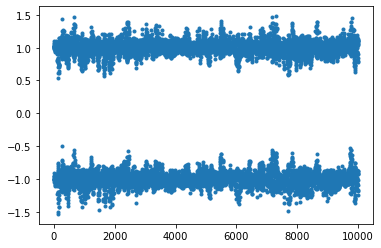

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import random as random

#entradas
N = 10000
r = 3
w = 1
d = 2
mu = 0.001

#gera pontos
def doubleMoon(r, w, d, N):
    theta = np.pi*np.random.rand(int(N/2),1)
    rho = w*np.random.rand(int(N/2),1)+r

    x = rho*np.cos(theta)
    y = rho*np.sin(theta)
    
    coordenadasCima = np.concatenate((x, y, np.sign(y)), axis=1)
    coordenadasBaixo = np.concatenate(((r+0.5*w)+x, -y-d, np.sign(-y)), axis=1)
    
    #plt.plot(coordenadasCima[:,0], coordenadasCima[:,1], '.')
    #plt.plot(coordenadasBaixo[:,0], coordenadasBaixo[:,1], '.')
     
    coordenadas = np.random.permutation(np.concatenate((coordenadasCima, coordenadasBaixo), axis=0))
    
    dn = coordenadas[:,2]
    
    return coordenadas, dn, N

#lms
def lms(coordenadas, dn, N, mu):
    yn = np.zeros(N)
    en = np.zeros(N)
    wn = np.zeros((2, N+1))
    for i in range(N):
        yn[i] = np.dot(coordenadas[i,0:2], np.transpose(wn[:,i]))
        en[i] = (dn[i] - yn[i])
        wn[:,i+1] = wn[:,i] +  mu * en[i] * coordenadas[i,0:2]

    return np.sign(yn), en, wn 

#erro
def erro(dn, yn, N):
    erros = np.sum(abs(dn-yn))/2
    return (erros/N)*100

#retornos dados análise
coordenadas = doubleMoon(r, w, d, N)[0]
dn = doubleMoon(r, w, d, N)[1]

#retornos lms
yn = lms(coordenadas, dn, N, mu)[0]
en = lms(coordenadas, dn, N, mu)[1]
wn = lms(coordenadas, dn, N, mu)[2]

#cálculo erro
erro(dn, yn, N)

plt.figure()
plt.plot(np.transpose(en), '.')

